# Assignment 3

## By Abdulrhman AlGhamdi - 441102465

### start by importing all the necessary libraries

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### uploading the dataset

In [48]:
df = pd.read_csv(r"aqardata_2.csv")

df.head()

mainlocation sublocation      neighborhood   frontage purpose  streetwidth  \
0       الرياض  غرب الرياض       حي ظهرة لبن       شمال    سكني         20.0   
1        بريدة         NaN           حي مشعل        غرب     NaN         15.0   
2        الخبر         NaN         حي الحمرا        غرب   تجاري        100.0   
3        الخبر         NaN  حي الحزام الاخضر        شرق     NaN         15.0   
4        بريدة         NaN         حي الرحاب  جنوب غربي     NaN         40.0   

   size  Pricepm  
0   727     1800  
1   450      950  
2  1450     3500  
3   440     2700  
4   784      950

### understanding the data

In [49]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mainlocation  2951 non-null   object 
 1   sublocation   2276 non-null   object 
 2   neighborhood  2951 non-null   object 
 3   frontage      2951 non-null   object 
 4   purpose       2604 non-null   object 
 5   streetwidth   2948 non-null   float64
 6   size          2951 non-null   int64  
 7   Pricepm       2951 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 184.6+ KB
None
mainlocation      0
sublocation     675
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64


In [50]:
df[df['sublocation'].isnull()]

mainlocation sublocation         neighborhood   frontage  \
1               بريدة         NaN              حي مشعل        غرب   
2               الخبر         NaN            حي الحمرا        غرب   
3               الخبر         NaN     حي الحزام الاخضر        شرق   
4               بريدة         NaN            حي الرحاب  جنوب غربي   
7               سكاكا         NaN  حي مخطط كريم الدرزي       شمال   
...               ...         ...                  ...        ...   
2941  المدينة المنورة         NaN            حي الدفاع  جنوب شرقي   
2944             ابها         NaN             حي القرى       شمال   
2947     رياض الخبراء         NaN            حي النزهة  شمال غربي   
2948            بريدة         NaN             حي الحمر        شرق   
2950           الزلفي         NaN          حي الصناعية       شمال   

            purpose  streetwidth    size  Pricepm  
1               NaN         15.0     450      950  
2             تجاري        100.0    1450     3500  
3               NaN         15.0     440     2700  
4               NaN         40.0     784      950  
7              سكني         15.0     735      219  
...             ...          ...     ...      ...  
2941           سكني          5.0    1421     1050  
2944  سكني أو تجاري         30.0     600     1000  
2947  سكني أو تجاري        100.0  143875      125  
2948           سكني         15.0     934      550  
2950           سكني         20.0    1200      166  

[675 rows x 8 columns]

In [51]:
df[df['purpose'].isnull()]

mainlocation  sublocation      neighborhood   frontage purpose  \
1               بريدة          NaN           حي مشعل        غرب     NaN   
3               الخبر          NaN  حي الحزام الاخضر        شرق     NaN   
4               بريدة          NaN         حي الرحاب  جنوب غربي     NaN   
8              الجموم          NaN         حي النسيم        غرب     NaN   
17             الرياض  جنوب الرياض          حي السلي       شمال     NaN   
...               ...          ...               ...        ...     ...   
2883           الرياض  شمال الرياض          حي بنبان       شمال     NaN   
2902           الرياض  شمال الرياض       حي المحمدية  جنوب شرقي     NaN   
2904  المدينة المنورة          NaN        حي العانبس        شرق     NaN   
2924              جدة     شمال جدة        حي الصوارى        شرق     NaN   
2945           الرياض  شمال الرياض          حي بنبان    3 شوارع     NaN   

      streetwidth    size  Pricepm  
1            15.0     450      950  
3            15.0     440     2700  
4            40.0     784      950  
8            60.0  153500      195  
17           60.0    1800     1666  
...           ...     ...      ...  
2883         20.0     744      580  
2902         15.0     729     5000  
2904         20.0     485     3917  
2924         30.0     672     1636  
2945         40.0    1600     1630  

[347 rows x 8 columns]

In [52]:
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features].describe()

mainlocation  sublocation neighborhood frontage purpose
count          2951         2276         2951     2951    2604
unique           45            7          288       10       4
top          الرياض  شمال الرياض    حي الملقا     جنوب    سكني
freq           2100         1188          313      488    2005

In [53]:
df[["streetwidth" , "size","Pricepm"]].describe()

streetwidth          size       Pricepm
count  2948.000000  2.951000e+03   2951.000000
mean     24.691995  1.040184e+04   2624.025754
std      15.208720  2.033230e+05   2970.544618
min       1.000000  8.100000e+01      1.000000
25%      15.000000  5.750000e+02   1200.000000
50%      20.000000  8.250000e+02   2600.000000
75%      30.000000  1.350000e+03   3500.000000
max     100.000000  1.000000e+07  83333.000000

In [54]:
df['mainlocation'].value_counts()

الرياض                            2100
الخبر                              242
جدة                                176
الدرعية                             64
المدينة المنورة                     56
بريدة                               55
الدمام                              40
الهفوف                              26
الزلفي                              25
مكة المكرمة                         20
جازان                               17
ثادق                                14
الرس                                13
ابها                                11
الخرج                               10
رابغ                                10
المزاحمية                            7
بيش                                  6
احد رفيده                            6
ثول                                  6
عنيزة                                5
ابو عريش                             4
المجمعة                              3
الظهران                              3
الطائف                               3
سكاكا                    

In [55]:
df['sublocation'].value_counts(dropna=False)

شمال الرياض    1188
NaN             675
شرق الرياض      482
غرب الرياض      337
شمال جدة        171
جنوب الرياض      81
وسط الرياض       12
جنوب جدة          5
Name: sublocation, dtype: int64

In [56]:
df['purpose'].value_counts(dropna=False)

سكني             2005
NaN               347
تجاري             329
سكني أو تجاري     268
غير محدد            2
Name: purpose, dtype: int64

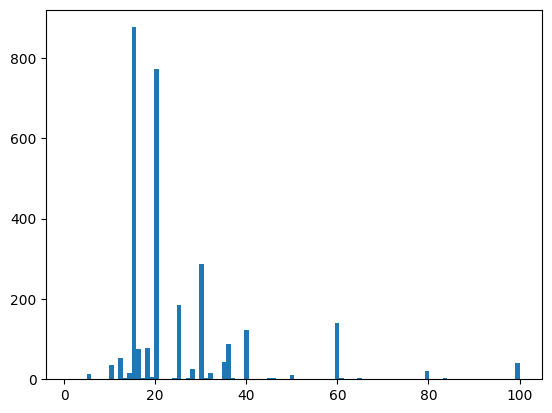

In [57]:
plt.hist(df['streetwidth'], bins=100)
plt.show()

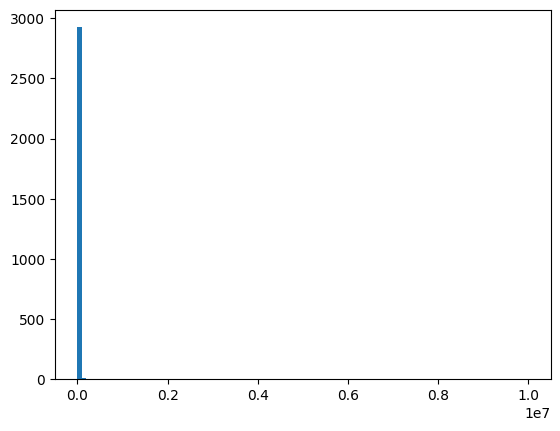

In [58]:
plt.hist(df['size'], bins=100)
plt.show()

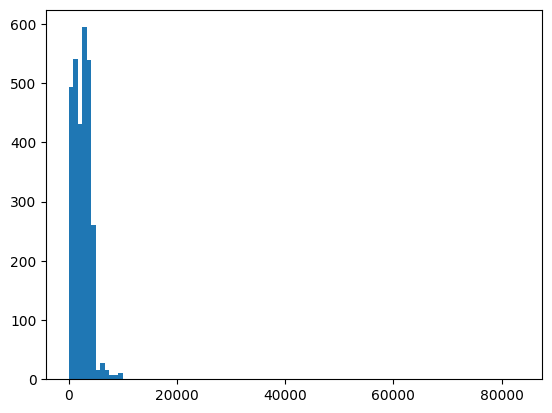

In [59]:
plt.hist(df['Pricepm'], bins=100)
plt.show()

### Cleaning the data

In [60]:
# sublocations' missing values will be changed with the mainlocation

df["sublocation"].fillna(df.mainlocation,inplace=True)
df.isnull().sum()

mainlocation      0
sublocation       0
neighborhood      0
frontage          0
purpose         347
streetwidth       3
size              0
Pricepm           0
dtype: int64

In [61]:
# purposes' missing values will be changed with (غير محدد) since it represent unknown

df['purpose'].fillna('غير محدد', inplace=True)
df.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     3
size            0
Pricepm         0
dtype: int64

In [62]:
# streetwidths' missing values will be changed with median because it's a fixed value so we can't take the mean

df['streetwidth'].fillna(df['streetwidth'].median(), inplace=True)
df.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
frontage        0
purpose         0
streetwidth     0
size            0
Pricepm         0
dtype: int64

In [63]:
# making a copy of the data frame for later

df_copy = df.copy()

df_copy.head()

mainlocation sublocation      neighborhood   frontage   purpose  \
0       الرياض  غرب الرياض       حي ظهرة لبن       شمال      سكني   
1        بريدة       بريدة           حي مشعل        غرب  غير محدد   
2        الخبر       الخبر         حي الحمرا        غرب     تجاري   
3        الخبر       الخبر  حي الحزام الاخضر        شرق  غير محدد   
4        بريدة       بريدة         حي الرحاب  جنوب غربي  غير محدد   

   streetwidth  size  Pricepm  
0         20.0   727     1800  
1         15.0   450      950  
2        100.0  1450     3500  
3         15.0   440     2700  
4         40.0   784      950

In [64]:
# one-hot encoding so it becomes a numerical value for the models to digest

df = pd.get_dummies(df).astype(np.number)
df

streetwidth      size  Pricepm  mainlocation_ابها  \
0            20.0     727.0   1800.0                0.0   
1            15.0     450.0    950.0                0.0   
2           100.0    1450.0   3500.0                0.0   
3            15.0     440.0   2700.0                0.0   
4            40.0     784.0    950.0                0.0   
...           ...       ...      ...                ...   
2946         20.0     354.0   1200.0                0.0   
2947        100.0  143875.0    125.0                0.0   
2948         15.0     934.0    550.0                0.0   
2949         15.0     832.0   2900.0                0.0   
2950         20.0    1200.0    166.0                0.0   

      mainlocation_ابو عريش  mainlocation_احد رفيده  mainlocation_الجموم  \
0                       0.0                     0.0                  0.0   
1                       0.0                     0.0                  0.0   
2                       0.0                     0.0                  0.0   
3                       0.0                     0.0                  0.0   
4                       0.0                     0.0                  0.0   
...                     ...                     ...                  ...   
2946                    0.0                     0.0                  0.0   
2947                    0.0                     0.0                  0.0   
2948                    0.0                     0.0                  0.0   
2949                    0.0                     0.0                  0.0   
2950                    0.0                     0.0                  0.0   

      mainlocation_الخبر  mainlocation_الخرج  mainlocation_الدرعية  ...  \
0                    0.0                 0.0                   0.0  ...   
1                    0.0                 0.0                   0.0  ...   
2                    1.0                 0.0                   0.0  ...   
3                    1.0                 0.0                   0.0  ...   
4                    0.0                 0.0                   0.0  ...   
...                  ...                 ...                   ...  ...   
2946                 0.0                 0.0                   0.0  ...   
2947                 0.0                 0.0                   0.0  ...   
2948                 0.0                 0.0                   0.0  ...   
2949                 0.0                 0.0                   0.0  ...   
2950                 0.0                 0.0                   0.0  ...   

      frontage_جنوب غربي  frontage_شرق  frontage_شمال  frontage_شمال شرقي  \
0                    0.0           0.0            1.0                 0.0   
1                    0.0           0.0            0.0                 0.0   
2                    0.0           0.0            0.0                 0.0   
3                    0.0           1.0            0.0                 0.0   
4                    1.0           0.0            0.0                 0.0   
...                  ...           ...            ...                 ...   
2946                 0.0           0.0            0.0                 0.0   
2947                 0.0           0.0            0.0                 0.0   
2948                 0.0           1.0            0.0                 0.0   
2949                 0.0           0.0            0.0                 0.0   
2950                 0.0           0.0            1.0                 0.0   

      frontage_شمال غربي  frontage_غرب  purpose_تجاري  purpose_سكني  \
0                    0.0           0.0            0.0           1.0   
1                    0.0           1.0            0.0           0.0   
2                    0.0           1.0            1.0           0.0   
3                    0.0           0.0            0.0           0.0   
4                    0.0           0.0            0.0           0.0   
...                  ...           ...            ...           ...   
2946                 1.0           0.0            0.0        

In [65]:
# making all columns type int leaving only the original numerical features as floats

for column in df:
    if column == 'streetwidth' or column == 'size' or column == 'Pricepm':
        continue
    df[column] = df[column].astype(int)
df

streetwidth      size  Pricepm  mainlocation_ابها  \
0            20.0     727.0   1800.0                  0   
1            15.0     450.0    950.0                  0   
2           100.0    1450.0   3500.0                  0   
3            15.0     440.0   2700.0                  0   
4            40.0     784.0    950.0                  0   
...           ...       ...      ...                ...   
2946         20.0     354.0   1200.0                  0   
2947        100.0  143875.0    125.0                  0   
2948         15.0     934.0    550.0                  0   
2949         15.0     832.0   2900.0                  0   
2950         20.0    1200.0    166.0                  0   

      mainlocation_ابو عريش  mainlocation_احد رفيده  mainlocation_الجموم  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    0   
3                         0                       0                    0   
4                         0                       0                    0   
...                     ...                     ...                  ...   
2946                      0                       0                    0   
2947                      0                       0                    0   
2948                      0                       0                    0   
2949                      0                       0                    0   
2950                      0                       0                    0   

      mainlocation_الخبر  mainlocation_الخرج  mainlocation_الدرعية  ...  \
0                      0                   0                     0  ...   
1                      0                   0                     0  ...   
2                      1                   0                     0  ...   
3                      1                   0                     0  ...   
4                      0                   0                     0  ...   
...                  ...                 ...                   ...  ...   
2946                   0                   0                     0  ...   
2947                   0                   0                     0  ...   
2948                   0                   0                     0  ...   
2949                   0                   0                     0  ...   
2950                   0                   0                     0  ...   

      frontage_جنوب غربي  frontage_شرق  frontage_شمال  frontage_شمال شرقي  \
0                      0             0              1                   0   
1                      0             0              0                   0   
2                      0             0              0                   0   
3                      0             1              0                   0   
4                      1             0              0                   0   
...                  ...           ...            ...                 ...   
2946                   0             0              0                   0   
2947                   0             0              0                   0   
2948                   0             1              0                   0   
2949                   0             0              0                   0   
2950                   0             0              1                   0   

      frontage_شمال غربي  frontage_غرب  purpose_تجاري  purpose_سكني  \
0                      0             0              0             1   
1                      0             1              0             0   
2                      0             1              1             0   
3                      0             0              0             0   
4                      0             0              0             0   
...                  ...           ...            ...           ...   
2946                   1             0              0        

### Splitting the data and making the K-folds

In [66]:
# splitting the dataset into X and y

X = df[:]
X = X.drop('Pricepm', axis=1)

y = df['Pricepm']

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=24)

### Creating the models

In [68]:
# Linear Regression model

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

# Perform 5-fold cross-validation
scores1_mae = cross_val_score(model1, X, y, cv=kfold, scoring='neg_mean_absolute_error')
scores1_rmse = cross_val_score(model1, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
scores1_r2 = cross_val_score(model1, X, y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error = ', -scores1_mae.mean())
print('Root mean squared error = ', -scores1_rmse.mean())
print('R2 = ', scores1_r2.mean())

Mean absolute error =  4105323.3686945564
Root mean squared error =  45324835.472708814
R2 =  -1447737221.1265614


In [69]:
# Support Vector Machine (Regression) model

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model2 = SVR(kernel='linear')

# Perform 5-fold cross-validation
scores2_mae = cross_val_score(model2, X_scaled, y, cv=kfold, scoring='neg_mean_absolute_error')
scores2_rmse = cross_val_score(model2, X_scaled, y, cv=kfold, scoring='neg_root_mean_squared_error')
scores2_r2 = cross_val_score(model2, X_scaled, y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error = ', -scores2_mae.mean())
print('Root mean squared error = ', -scores2_rmse.mean())
print('R2 = ', scores2_r2.mean())

Mean absolute error =  593.6427443964948
Root mean squared error =  2364.5406811760445
R2 =  0.3196031523076973


In [70]:
# Random Forest Regressor model

from sklearn.ensemble import RandomForestRegressor

model3 = RandomForestRegressor()

# Perform 5-fold cross-validation
scores3_mae = cross_val_score(model3, X, y, cv=kfold, scoring='neg_mean_absolute_error')
scores3_rmse = cross_val_score(model3, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
scores3_r2 = cross_val_score(model3, X, y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error = ', -scores3_mae.mean())
print('Root mean squared error = ', -scores3_rmse.mean())
print('R2 = ', scores3_r2.mean())

Mean absolute error =  517.207550751925
Root mean squared error =  2205.170176611858
R2 =  0.23920670201187696


In [71]:
# K-Nearest Neighbors Regressor model

from sklearn.neighbors import KNeighborsRegressor

model4 = KNeighborsRegressor()

# Perform 5-fold cross-validation
scores4_mae = cross_val_score(model4, X, y, cv=kfold, scoring='neg_mean_absolute_error')
scores4_rmse = cross_val_score(model4, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
scores4_r2 = cross_val_score(model4, X, y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error (K-Nearest Neighbors) = ', -scores4_mae.mean())
print('Root mean squared error (K-Nearest Neighbors) = ', -scores4_rmse.mean())
print('R2 (K-Nearest Neighbors) = ', scores4_r2.mean())

Mean absolute error (K-Nearest Neighbors) =  1263.5223959390864
Root mean squared error (K-Nearest Neighbors) =  2882.237907077321
R2 (K-Nearest Neighbors) =  -0.10878634040886644


### what about more data?

In [100]:
# read the file

df2 = pd.read_excel('docrealestatesale_2023_q3.xlsx')
df2.head()

المنطقة   المدينة           المدينة / الحي  \
0           منطقة الرياض   الافلاج  الافلاج/ الملك عبدالله    
1           منطقة الرياض    الرياض              الرياض/عريض   
2           منطقة الرياض    الرياض              الرياض/نمار   
3  منطقة المدينة المنوره  الصويدره            الصويدره/أخرى   
4             منطقة حائل    الشنان              الشنان/أخرى   

   الرقم المرجعي للصفقة تاريخ الصفقة ميلادي تاريخ الصفقة هجري تصنيف العقار  \
0              20289286          2023/07/01        1444/12/13         سكني   
1              20289169          2023/07/01        1444/12/13         سكني   
2              20289165          2023/07/01        1444/12/13         سكني   
3              20289168          2023/07/01        1444/12/13         سكني   
4              20289133          2023/07/01        1444/12/13         سكني   

  نوع العقار  عدد العقارات     السعر  المساحة  
0   قطعة أرض             1   53000.0   660.00  
1   قطعة أرض             1  300000.0   450.00  
2   قطعة أرض             1  430000.0   300.00  
3   قطعة أرض             1   73000.0   642.06  
4   قطعة أرض             1   50000.0  1050.00

### preprocessing the new data

In [101]:
# change the columns names

df2.rename(columns={
    'المنطقة': 'mainlocation',
    'المدينة': 'sublocation',
    'المدينة / الحي': 'Neighborhood',
    'الرقم المرجعي للصفقة': 'Deal Reference Number',
    'تاريخ الصفقة ميلادي': 'Deal Date Gregorian',
    'تاريخ الصفقة هجري': 'Deal Date Hijri',
    'تصنيف العقار': 'purpose',
    'نوع العقار': 'Property Type',
    'عدد العقارات': 'Number of Properties',
    'السعر': 'Price',
    'المساحة': 'size'
}, inplace=True)

In [102]:
# drop the unneeded columns

dropped = ['Deal Reference Number', 'Deal Date Gregorian', 'Deal Date Hijri']
df2.drop(columns=dropped, inplace=True)

#### removing the values that doesn't match the previous dataframe

In [104]:
df2['Property Type'].value_counts()

قطعة أرض      39029
شقة            7747
أرض زراعية     1243
بيت             317
معرض/محل         96
فيلا             74
مرفق             17
عمارة            10
مركز تجاري        7
إستراحة           5
Name: Property Type, dtype: int64

In [105]:
df2 = df2[df2['Property Type'] == 'قطعة أرض']

df2['Property Type'].value_counts()

قطعة أرض    39029
Name: Property Type, dtype: int64

In [106]:
df2['Number of Properties'].value_counts()

1     38561
2       262
4        68
3        26
6        25
10       19
8        17
12       15
14        7
5         6
15        5
18        4
7         4
20        3
11        2
16        2
28        1
17        1
13        1
Name: Number of Properties, dtype: int64

In [107]:
df2 = df2[df2['Number of Properties'] == 1]

df2['Number of Properties'].value_counts()

1    38561
Name: Number of Properties, dtype: int64

In [108]:
df2['purpose'].value_counts()

سكني     33108
تجاري     5384
زراعي       68
أخرى         1
Name: purpose, dtype: int64

In [109]:
df2 = df2[(df2['purpose'] == 'سكني') | (df2['purpose'] == 'تجاري')]

df2['purpose'].value_counts()

سكني     33108
تجاري     5384
Name: purpose, dtype: int64

In [110]:
# removing the word (منطقة) from the mainlocation column

df2['mainlocation'] = df2['mainlocation'].str.replace('منطقة', '')

In [111]:
# changing the type of Price and size to float

df2[['Price', 'size']].astype(float)

Price     size
0        53000.00   660.00
1       300000.00   450.00
2       430000.00   300.00
3        73000.00   642.06
4        50000.00  1050.00
...           ...      ...
48538   725000.00   420.00
48539   950000.00   500.00
48540  1090000.00   432.00
48542   380000.00  2388.00
48543   811142.54   725.53

[38492 rows x 2 columns]

In [112]:
# the price is for the whole land, so I need to change it to be per meter

df2['Price'] = df2['Price'] / df2['size']

df2.head()

mainlocation sublocation             Neighborhood purpose  \
0            الرياض     الافلاج  الافلاج/ الملك عبدالله     سكني   
1            الرياض      الرياض              الرياض/عريض    سكني   
2            الرياض      الرياض              الرياض/نمار    سكني   
3   المدينة المنوره    الصويدره            الصويدره/أخرى    سكني   
4              حائل      الشنان              الشنان/أخرى    سكني   

  Property Type  Number of Properties        Price     size  
0      قطعة أرض                     1    80.303030   660.00  
1      قطعة أرض                     1   666.666667   450.00  
2      قطعة أرض                     1  1433.333333   300.00  
3      قطعة أرض                     1   113.696539   642.06  
4      قطعة أرض                     1    47.619048  1050.00

In [113]:
# change the name of the columns to match the previous dataframe
df2.rename(columns={'Price' : 'Pricepm', 'Neighborhood' :'neighborhood'}, inplace=True)

# dropping these columns after I used them to filter the lands
df2.drop(columns=['Number of Properties', 'Property Type'], inplace=True)

df2.head()

mainlocation sublocation             neighborhood purpose      Pricepm  \
0            الرياض     الافلاج  الافلاج/ الملك عبدالله     سكني    80.303030   
1            الرياض      الرياض              الرياض/عريض    سكني   666.666667   
2            الرياض      الرياض              الرياض/نمار    سكني  1433.333333   
3   المدينة المنوره    الصويدره            الصويدره/أخرى    سكني   113.696539   
4              حائل      الشنان              الشنان/أخرى    سكني    47.619048   

      size  
0   660.00  
1   450.00  
2   300.00  
3   642.06  
4  1050.00

In [85]:
df2.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
purpose         0
Pricepm         0
size            0
dtype: int64

In [86]:
df_copy.head()

mainlocation sublocation      neighborhood   frontage   purpose  \
0       الرياض  غرب الرياض       حي ظهرة لبن       شمال      سكني   
1        بريدة       بريدة           حي مشعل        غرب  غير محدد   
2        الخبر       الخبر         حي الحمرا        غرب     تجاري   
3        الخبر       الخبر  حي الحزام الاخضر        شرق  غير محدد   
4        بريدة       بريدة         حي الرحاب  جنوب غربي  غير محدد   

   streetwidth  size  Pricepm  
0         20.0   727     1800  
1         15.0   450      950  
2        100.0  1450     3500  
3         15.0   440     2700  
4         40.0   784      950

### time to merge

In [ ]:
# drop the non matching columns from the original dataframe copy

df_copy.drop(columns=['frontage', 'streetwidth'], inplace=True)

df_copy.head()

In [115]:
# concat the two dataframes

new_df = pd.concat([df_copy, df2], axis=0)

new_df.head()

mainlocation sublocation      neighborhood   purpose    size  Pricepm
0       الرياض  غرب الرياض       حي ظهرة لبن      سكني   727.0   1800.0
1        بريدة       بريدة           حي مشعل  غير محدد   450.0    950.0
2        الخبر       الخبر         حي الحمرا     تجاري  1450.0   3500.0
3        الخبر       الخبر  حي الحزام الاخضر  غير محدد   440.0   2700.0
4        بريدة       بريدة         حي الرحاب  غير محدد   784.0    950.0

In [89]:
new_df.isnull().sum()

mainlocation    0
sublocation     0
neighborhood    0
purpose         0
size            0
Pricepm         0
dtype: int64

In [90]:
new_df.count()

mainlocation    41443
sublocation     41443
neighborhood    41443
purpose         41443
size            41443
Pricepm         41443
dtype: int64

In [91]:
new_df.dtypes

mainlocation     object
sublocation      object
neighborhood     object
purpose          object
size            float64
Pricepm         float64
dtype: object

In [116]:
# label encoding so it becomes a numerical value for the models to digest
# didn't use one-hot encoding because the dataframe became so large it takes a lot of time to train

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for column in new_df.columns:
    if new_df[column].dtype == 'object':
        new_df[column] = encoder.fit_transform(new_df[column]) + 1


new_df

mainlocation  sublocation  neighborhood  purpose     size      Pricepm
0                24          159          2535        2   727.00  1800.000000
1                37           94          2560        4   450.00   950.000000
2                18           24          2319        1  1450.00  3500.000000
3                18           24          2314        4   440.00  2700.000000
4                37           94          2341        4   784.00   950.000000
...             ...          ...           ...      ...      ...          ...
48538             8          103          1849        2   420.00  1726.190476
48539            12          169          3343        2   500.00  1900.000000
48540            12          169          3405        2   432.00  2523.148148
48542            11            2            80        2  2388.00   159.128978
48543            10          116          2200        2   725.53  1118.000000

[41443 rows x 6 columns]

In [117]:
new_df.describe()

mainlocation   sublocation  neighborhood       purpose          size  \
count  41443.000000  41443.000000  41443.000000  41443.000000  4.144300e+04   
mean       7.981179     76.174625   1463.990252      1.885457  2.407446e+03   
std        6.159004     48.346275    921.418208      0.406063  6.522168e+04   
min        1.000000      1.000000      1.000000      1.000000  0.000000e+00   
25%        4.000000     38.000000    708.000000      2.000000  3.990000e+02   
50%        5.000000     66.000000   1109.000000      2.000000  5.760000e+02   
75%       11.000000    115.000000   2192.500000      2.000000  7.440000e+02   
max       58.000000    177.000000   3498.000000      4.000000  1.000000e+07   

            Pricepm  
count  4.144300e+04  
mean            inf  
std             NaN  
min    8.108327e-02  
25%    2.453687e+02  
50%    6.060606e+02  
75%    1.575006e+03  
max             inf

In [93]:
# this is because Pricepm had some values less than one and equals infinity
# so i dropped those rows to not overburden the models

new_df = new_df[(new_df['Pricepm'] >= 1) & (new_df['Pricepm'] != float('inf'))]
new_df.describe()

mainlocation   sublocation  neighborhood       purpose          size  \
count  41425.000000  41425.000000  41425.000000  41425.000000  4.142500e+04   
mean       7.981171     76.170742   1463.904164      1.885600  2.346962e+03   
std        6.159860     48.346056    921.387938      0.405961  6.494247e+04   
min        1.000000      1.000000      1.000000      1.000000  4.200000e+00   
25%        4.000000     38.000000    708.000000      2.000000  3.990000e+02   
50%        5.000000     66.000000   1109.000000      2.000000  5.757000e+02   
75%       11.000000    115.000000   2192.000000      2.000000  7.440000e+02   
max       58.000000    177.000000   3498.000000      4.000000  1.000000e+07   

            Pricepm  
count  41425.000000  
mean    1293.705464  
std     2018.352626  
min        1.000000  
25%      246.031746  
50%      606.796117  
75%     1576.044145  
max    83333.000000

### spliting the new dataframe into X and y

In [94]:
# splitting the new dataset into X and y

new_X = new_df[:]
new_X = new_X.drop('Pricepm', axis=1)

new_y = new_df['Pricepm']

### creating the models for the new_df

In [95]:
# Linear Regression model

new_model1 = LinearRegression()

# Perform 5-fold cross-validation
new_scores1_mae = cross_val_score(new_model1, new_X, new_y, cv=kfold, scoring='neg_mean_absolute_error')
new_scores1_rmse = cross_val_score(new_model1, new_X, new_y, cv=kfold, scoring='neg_root_mean_squared_error')
new_scores1_r2 = cross_val_score(new_model1, new_X, new_y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error = ', -new_scores1_mae.mean())
print('Root mean squared error = ', -new_scores1_rmse.mean())
print('R2 = ', new_scores1_r2.mean())

Mean absolute error =  1121.2023722085698
Root mean squared error =  1975.7484618763433
R2 =  0.03701462350330944


In [96]:
# Support Vector Machine (Regression) model

# Standardize the features
new_X_scaled = scaler.fit_transform(new_X)

new_model2 = SVR(kernel='linear')

# Perform 5-fold cross-validation
new_scores2_mae = cross_val_score(new_model2, new_X_scaled, new_y, cv=kfold, scoring='neg_mean_absolute_error')
new_scores2_rmse = cross_val_score(new_model2, new_X_scaled, new_y, cv=kfold, scoring='neg_root_mean_squared_error')
new_scores2_r2 = cross_val_score(new_model2, new_X_scaled, new_y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error = ', -new_scores2_mae.mean())
print('Root mean squared error = ', -new_scores2_rmse.mean())
print('R2 = ', new_scores2_r2.mean())

Mean absolute error =  994.6994525042986
Root mean squared error =  2075.690191744062
R2 =  -0.06371056051199


In [97]:
# Random Forest Regressor model

new_model3 = RandomForestRegressor()

# Perform 5-fold cross-validation
new_scores3_mae = cross_val_score(new_model3, new_X, new_y, cv=kfold, scoring='neg_mean_absolute_error')
new_scores3_rmse = cross_val_score(new_model3, new_X, new_y, cv=kfold, scoring='neg_root_mean_squared_error')
new_scores3_r2 = cross_val_score(new_model3, new_X, new_y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error = ', -new_scores3_mae.mean())
print('Root mean squared error = ', -new_scores3_rmse.mean())
print('R2 = ', new_scores3_r2.mean())

Mean absolute error =  477.9306497530527
Root mean squared error =  1510.9599602562198
R2 =  0.4318276695479832


In [98]:
# K-Nearest Neighbors Regressor model

new_model4 = KNeighborsRegressor()

# Perform 5-fold cross-validation
new_scores4_mae = cross_val_score(new_model4, new_X, new_y, cv=kfold, scoring='neg_mean_absolute_error')
new_scores4_rmse = cross_val_score(new_model4, new_X, new_y, cv=kfold, scoring='neg_root_mean_squared_error')
new_scores4_r2 = cross_val_score(new_model4, new_X, new_y, cv=kfold, scoring='r2')

# Evaluate the model
print('Mean absolute error (K-Nearest Neighbors) = ', -new_scores4_mae.mean())
print('Root mean squared error (K-Nearest Neighbors) = ', -new_scores4_rmse.mean())
print('R2 (K-Nearest Neighbors) = ', new_scores4_r2.mean())

Mean absolute error (K-Nearest Neighbors) =  644.2825183034853
Root mean squared error (K-Nearest Neighbors) =  1646.0590993298338
R2 (K-Nearest Neighbors) =  0.3339183566817138
